import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
file_path = '/kaggle/input/temperatures-of-india/temperatures.csv'
df = pd.read_csv('/content/temperatures.csv')
df.head()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


file_path = '/content/temperatures.csv'
df = pd.read_csv(file_path)


df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [3]:
#data cleaning and processing
df.isnull().sum()


df.dtypes


df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')


df.dtypes

,0
YEAR,datetime64[ns]
JAN,float64
FEB,float64
MAR,float64
APR,float64
MAY,float64
JUN,float64
JUL,float64
AUG,float64
SEP,float64


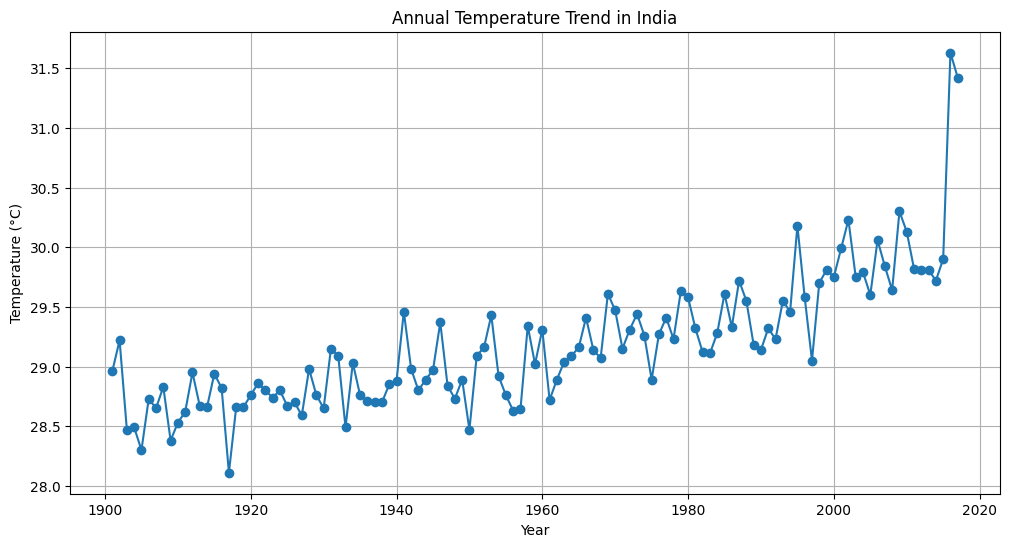

In [5]:
#exploring the data
df.describe()


plt.figure(figsize=(12, 6))
plt.plot(df['YEAR'], df['ANNUAL'], marker='o')
plt.title('Annual Temperature Trend in India')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

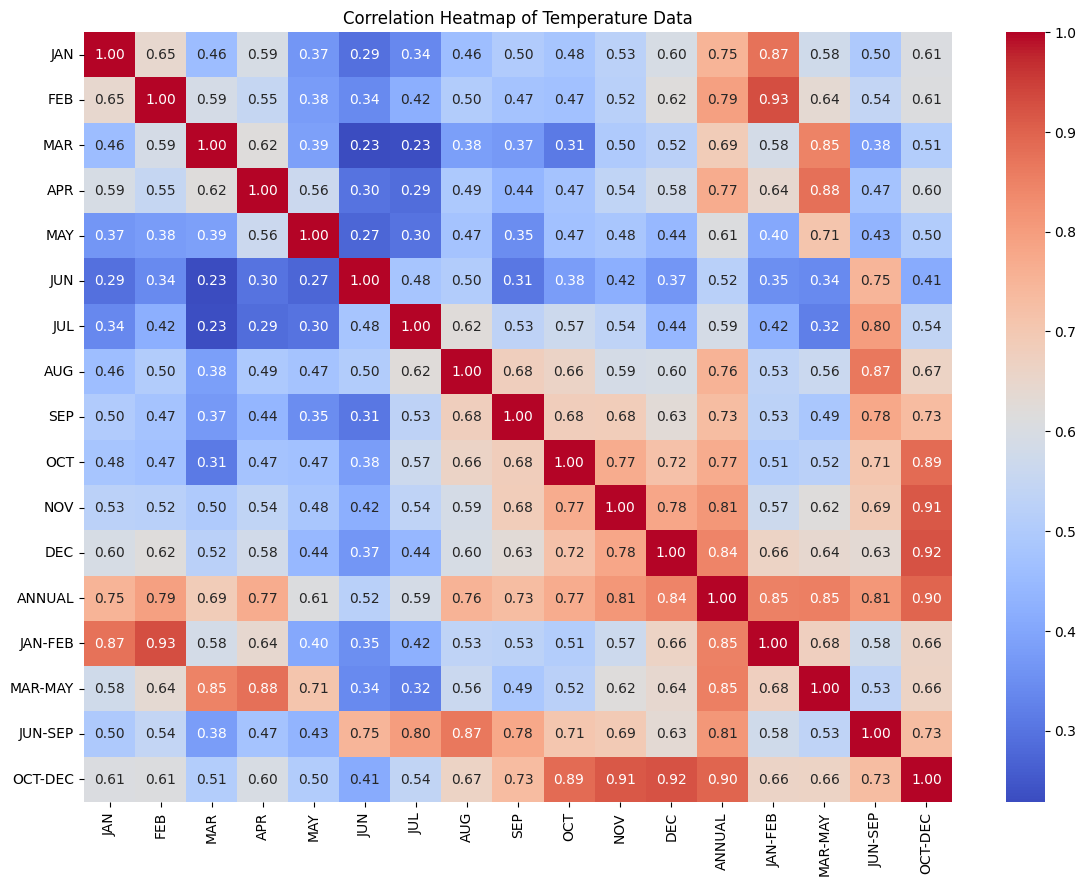

In [6]:
#corelation
numeric_df = df.select_dtypes(include=[np.number])


corr_matrix = numeric_df.corr()


plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Temperature Data')
plt.show()

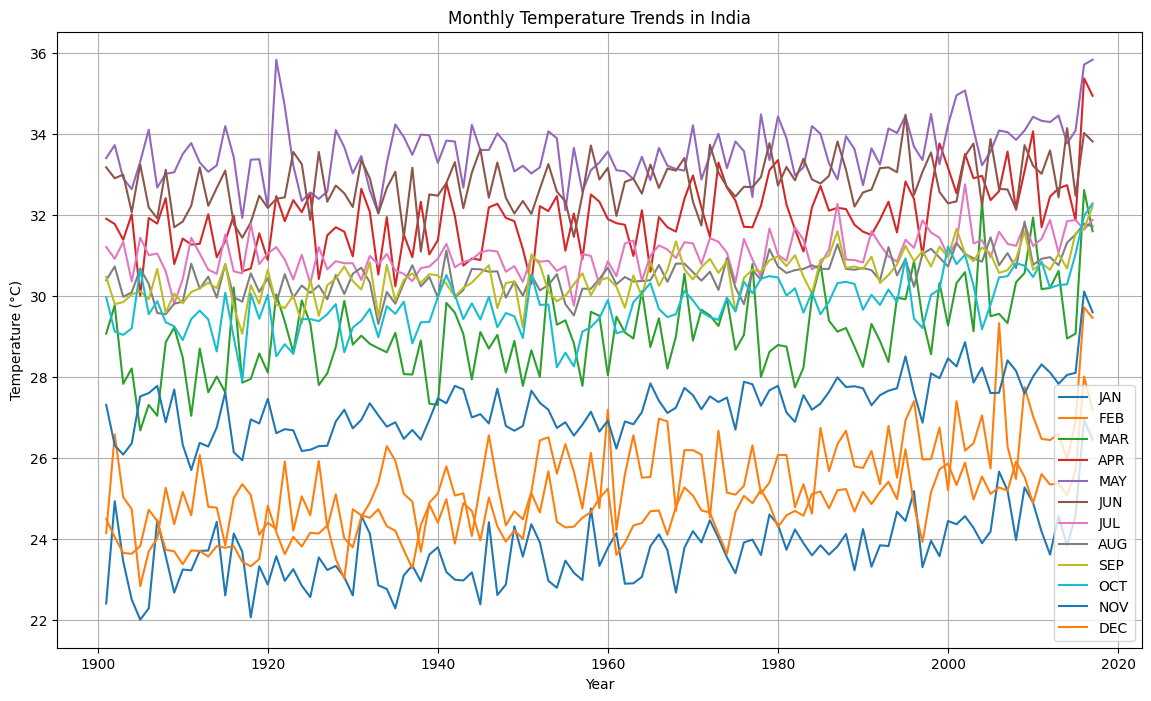

In [7]:
#temperature over the years
months = df.columns[1:13]
plt.figure(figsize=(14, 8))
for month in months:
 plt.plot(df['YEAR'], df[month], label=month)
plt.title('Monthly Temperature Trends in India')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#prediction model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df['YEAR'].dt.year.values.reshape(-1, 1)
y = df['ANNUAL'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.2062573233109893, 0.5733931056341353)